In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

# Load dataframes
awards_players = pd.read_csv('../data/awards_players.csv')
coaches = pd.read_csv('../data/coaches.csv')
players_teams = pd.read_csv('../data/players_teams.csv')
players = pd.read_csv('../data/players.csv')
series_post = pd.read_csv('../data/series_post.csv')
teams_post = pd.read_csv('../data/teams_post.csv')
teams = pd.read_csv('../data/teams.csv')

**Distribuition of awards**

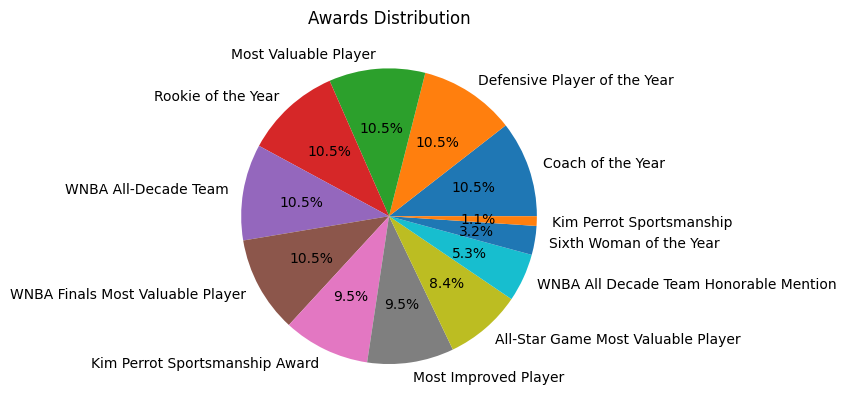

In [45]:
awards = awards_players['award'].value_counts()

plt.pie(awards, labels=awards.index, autopct='%1.1f%%')
plt.title('Awards Distribution')
plt.show()

**Teams with more wins**

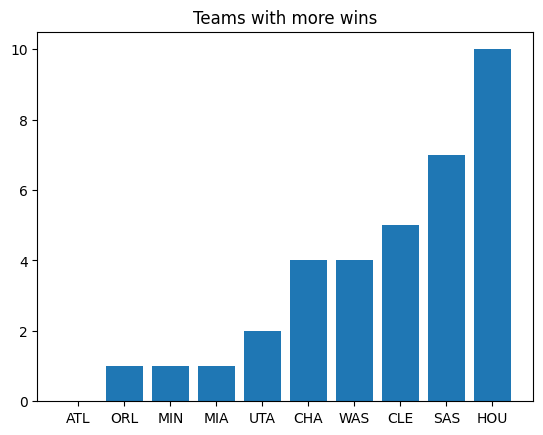

In [46]:
teams_wins = teams_post.groupby('tmID')['W'].sum().sort_values(ascending=True)
teams_wins = teams_wins.head(10)

plt.bar(teams_wins.index, teams_wins)
plt.title('Teams with more wins')
plt.show()

**Teams with more losses**

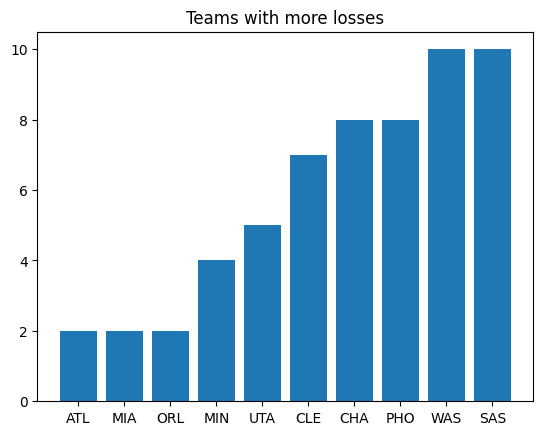

In [47]:
teams_losses = teams_post.groupby('tmID')['L'].sum().sort_values(ascending=True)
teams_losses = teams_losses.head(10)

plt.bar(teams_losses.index, teams_losses)
plt.title('Teams with more losses')
plt.show()

**Distribuition of colleges**

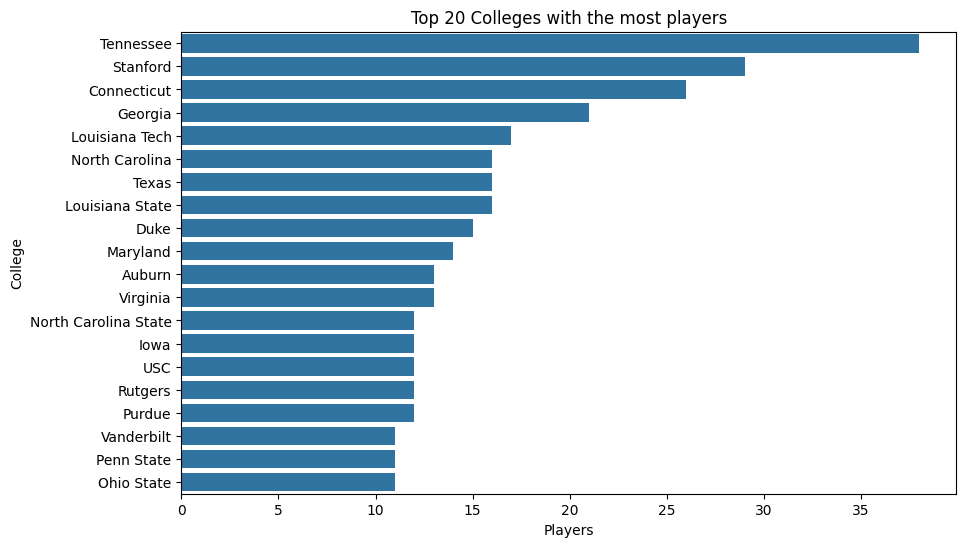

In [48]:
# Count the number of players for each college
players_per_college = players['college'].value_counts().reset_index()
players_per_college.columns = ['College', 'Players']

# Select the top 20 colleges
top_20_colleges = players_per_college.head(20)

# Plot the top 20 colleges
plt.figure(figsize=(10, 6))
sbn.barplot(x='Players', y='College', data=top_20_colleges)
plt.title('Top 20 Colleges with the most players')
plt.show()

**Distribuition of positions**

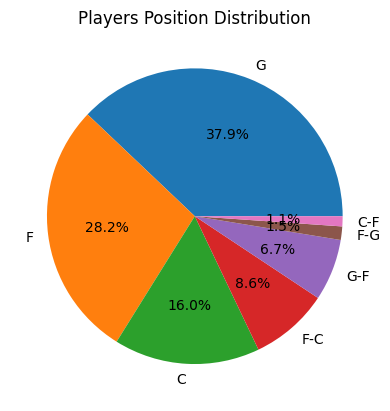

In [49]:
# pie chart with the distribution of the players' positions
players_position = players['pos'].value_counts()
plt.pie(players_position, labels=players_position.index, autopct='%1.1f%%')
plt.title('Players Position Distribution')
plt.show()

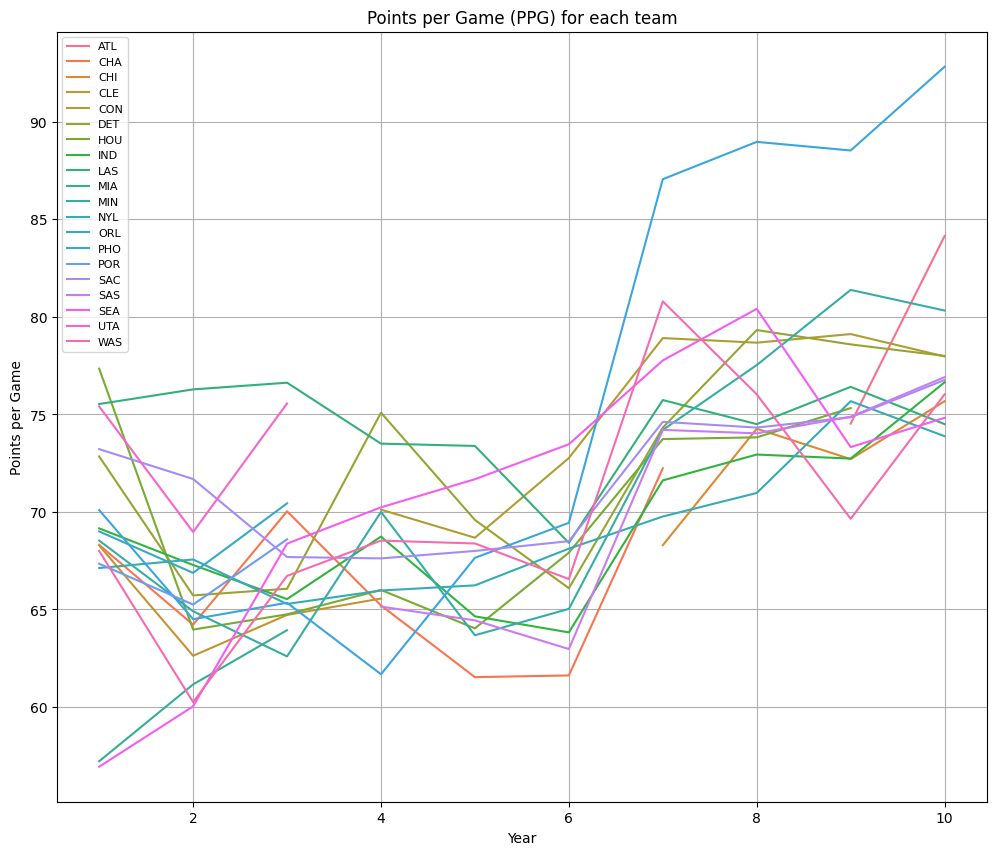

In [50]:
teams['PPG'] = teams['o_pts'] / teams['GP']

plt.figure(figsize=(12, 10))
sbn.lineplot(data=teams, x='year', y='PPG', hue='tmID')
plt.title('Points per Game (PPG) for each team')
plt.xlabel('Year')
plt.ylabel('Points per Game')
plt.legend(loc='upper left', fontsize='8')
plt.grid(True)
plt.show()


## Altura média por equipa

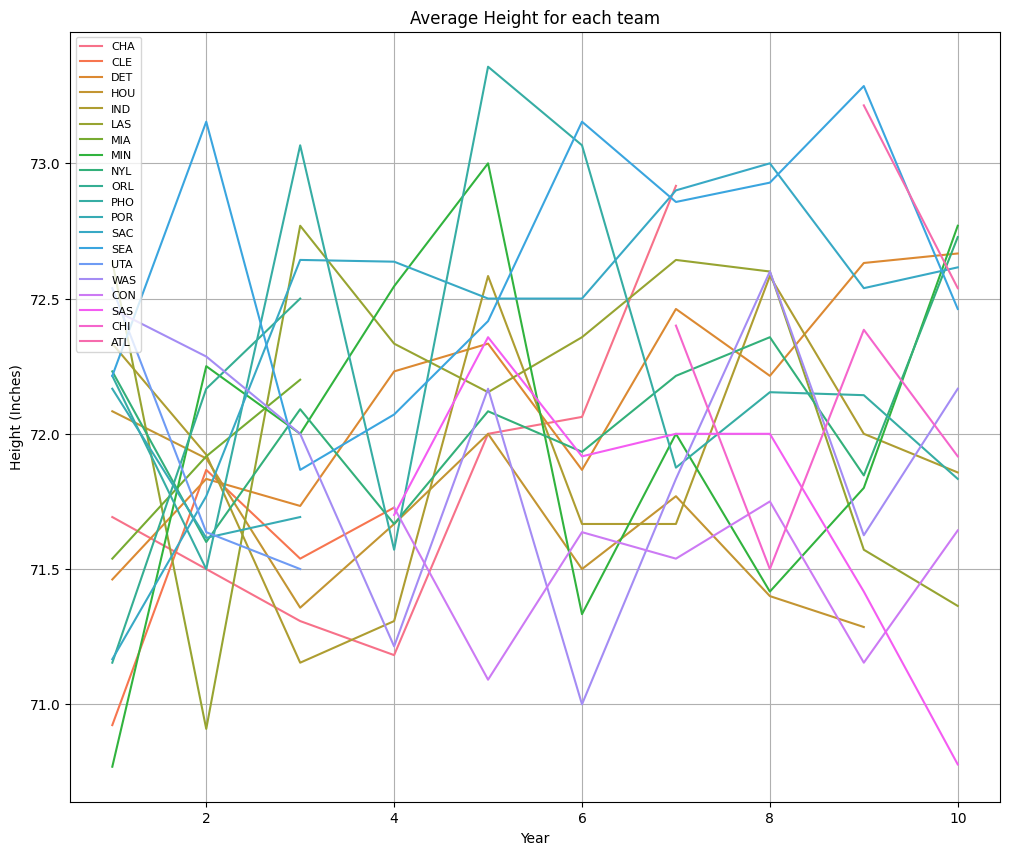

In [51]:
## make a graph to show the average height for every team

merged_data = pd.merge(players, players_teams, left_on='bioID', right_on='playerID')

# exclude the player wiht height < 50, like outliers and comm
merged_data = merged_data[merged_data['height'] > 50]

avg_height_per_team_year = merged_data.groupby(['year', 'tmID'])['height'].mean().reset_index()


plt.figure(figsize=(12, 10))


sbn.lineplot(data=avg_height_per_team_year, x='year', y='height', hue='tmID')
plt.title('Average Height for each team')
plt.xlabel('Year')
plt.ylabel('Height (Inches)')
plt.legend(loc='upper left', fontsize='8')
plt.grid(True)
plt.show()


## Teams with who qualified to the playoffs the most times

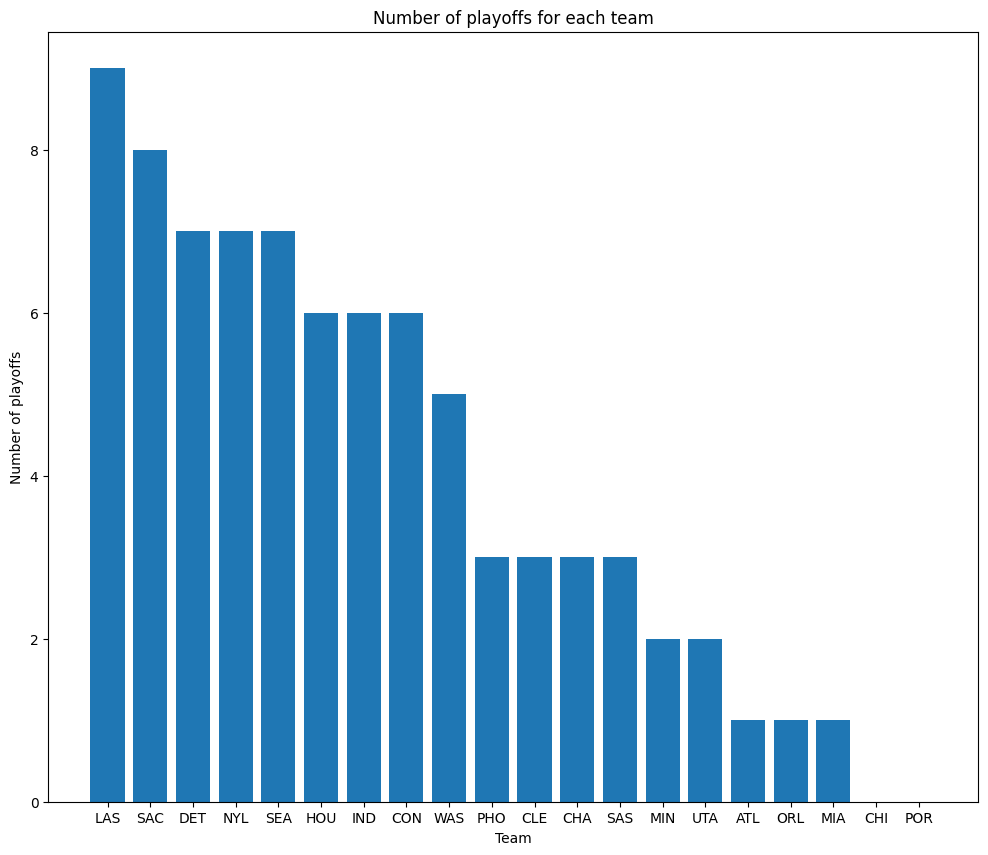

In [52]:
# make an bar graph to show the number of playoffs for each team ordered by the number of playoffs
# access the teams table which contains in each line a team in a corresponding year and the collumn 'playoff'

teams['playoffNumeric'] = teams['playoff'].map({'Y': 1, 'N': 0})
teams_playoffs = teams.groupby('tmID')['playoffNumeric'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.bar(teams_playoffs.index, teams_playoffs)
plt.title('Number of playoffs for each team')
plt.xlabel('Team')
plt.ylabel('Number of playoffs')
plt.show()


## Coaches with the most victories and losses

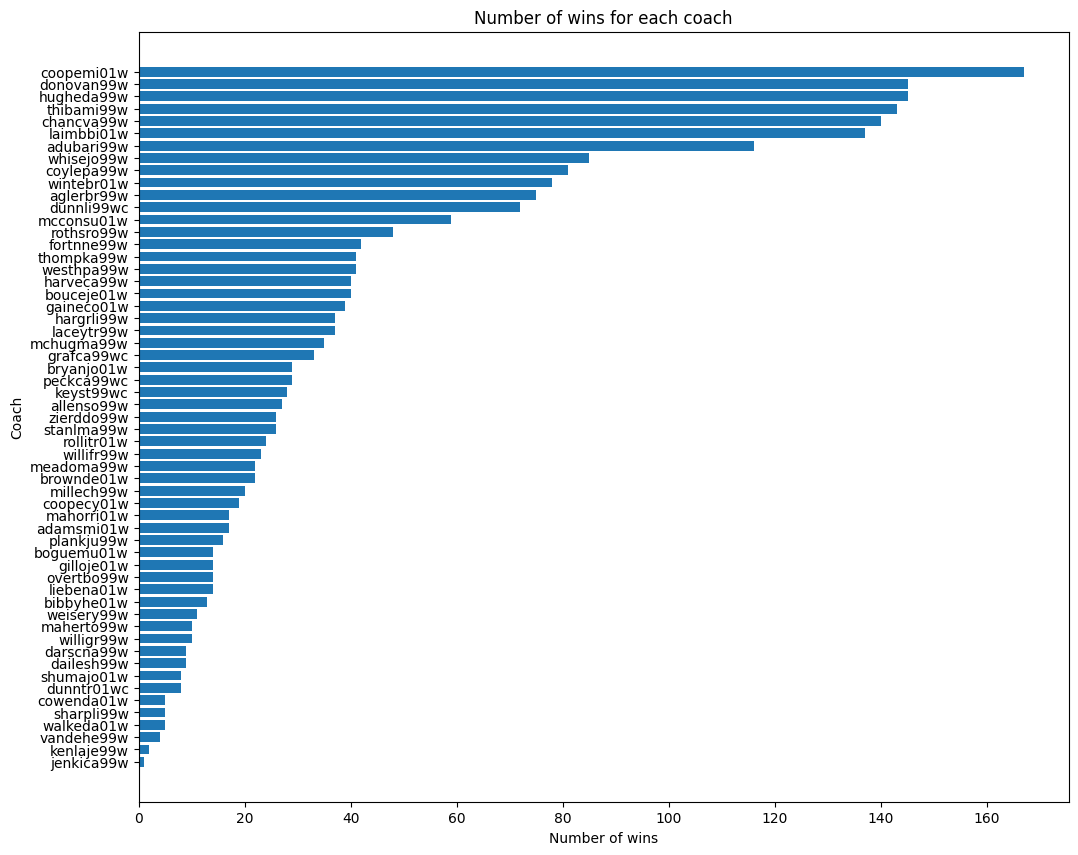

In [53]:
# make a bar graph to show the number of wins for each coach ordered by the number of wins

# table coaches has collumns lost and won, so we can sum them to get the total number of games

couches_wins = coaches.groupby('coachID')['won'].sum().sort_values(ascending=False)

# Use horizontal bar chart to improve label readability
plt.figure(figsize=(12, 10))
plt.barh(couches_wins.index, couches_wins)
plt.title('Number of wins for each coach')
plt.xlabel('Number of wins')
plt.ylabel('Coach')

# Reverse the order of the y-axis to show highest wins at the top
plt.gca().invert_yaxis()

plt.show()


We can observe a fast difference between the number of wins of each coach, which suggests they are important to consider when predicting the teams that are going to qualify to the playoffs.

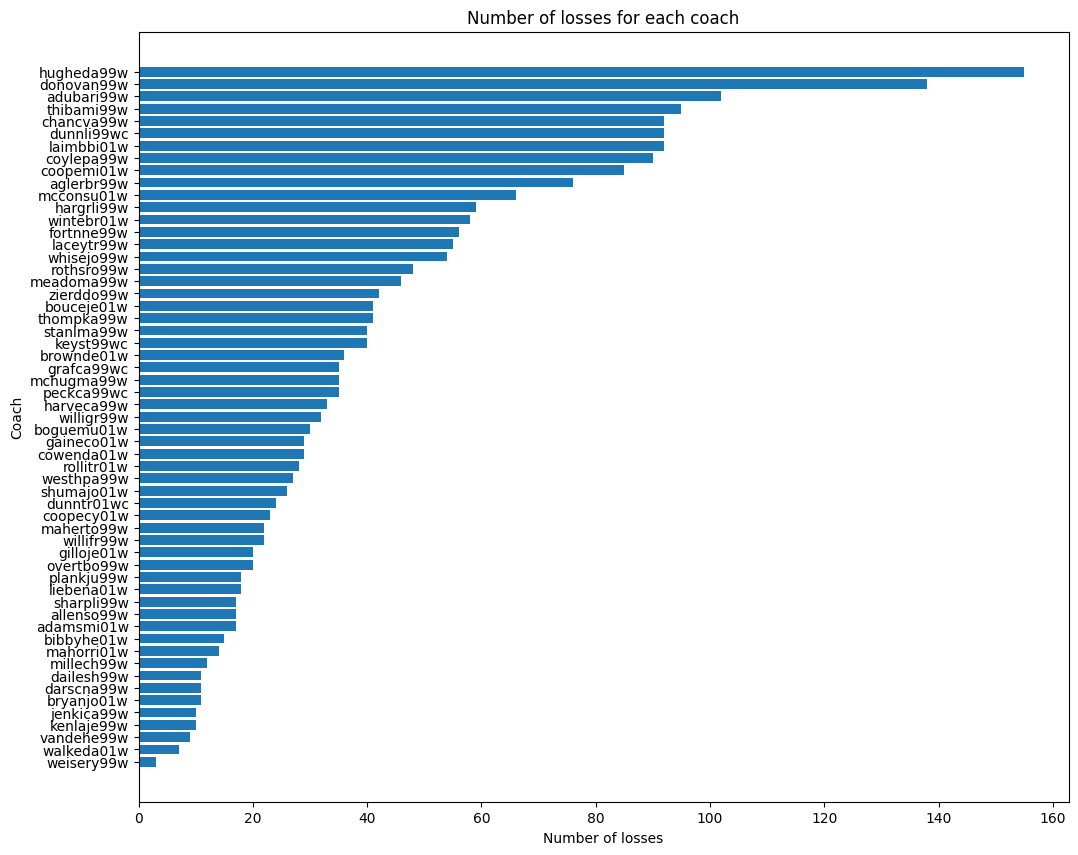

In [54]:
couches_losses = coaches.groupby('coachID')['lost'].sum().sort_values(ascending=False)

# Use horizontal bar chart to improve label readability
plt.figure(figsize=(12, 10))
plt.barh(couches_losses.index, couches_losses)
plt.title('Number of losses for each coach')
plt.xlabel('Number of losses')
plt.ylabel('Coach')

# Reverse the order of the y-axis to show highest wins at the top
plt.gca().invert_yaxis()

plt.show()

## Correlation between average height of a team and their win ratio

Unlike above, we consider teams in different years different team due to their difference in the players in those teams and so the difference in the average height of the team.

     year tmID  win_ratio     height
0       1  CHA   0.250000  71.692308
1       1  CLE   0.531250  70.923077
2       1  DET   0.437500  71.461538
3       1  HOU   0.843750  72.083333
4       1  IND   0.281250  72.333333
..    ...  ...        ...        ...
137    10  PHO   0.676471  71.833333
138    10  SAC   0.352941  72.615385
139    10  SAS   0.441176  70.777778
140    10  SEA   0.588235  72.461538
141    10  WAS   0.470588  72.166667

[142 rows x 4 columns]


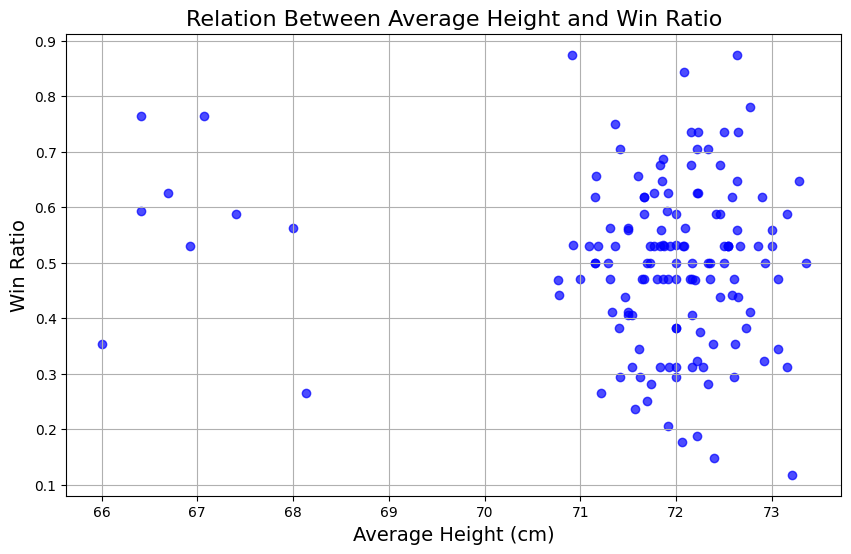

In [55]:
# calculate the win ratio for each team throguh the collumns 'won' and 'lost' : win ratio = won / (won + lost)
teams['win_ratio'] = teams['won'] / (teams['won'] + teams['lost'])

# join table players_teams, players and teams
players_teams_players = pd.merge(players_teams, players, left_on='playerID', right_on='bioID')
players_teams_players = pd.merge(players_teams_players, teams, left_on=['tmID', 'year'], right_on=['tmID', 'year'])

# drop couches in the players table (pos == null)
players_teams_players = players_teams_players[players_teams_players['pos'].notnull()]

# group by the year and the team and do the average of the height
avg_height_per_team_year = players_teams_players.groupby(['year', 'tmID', 'win_ratio'])['height'].mean().reset_index()
print(avg_height_per_team_year)

# Create a scatter plot to show the relation between average height and win ratio
plt.figure(figsize=(10, 6))
plt.scatter(avg_height_per_team_year['height'], avg_height_per_team_year['win_ratio'], color='b', alpha=0.7)

# Add titles and labels
plt.title('Relation Between Average Height and Win Ratio', fontsize=16)
plt.xlabel('Average Height (cm)', fontsize=14)
plt.ylabel('Win Ratio', fontsize=14)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()
